### Import Library

In [3]:
import pandas as pd
import numpy as np

In [4]:
from src.PortfolioIndicator import PortfolioIndicator
from src.PortfolioConstructor import PortfolioConstructor

### Import Data

In [5]:
data_directory = "data/"
file = "yahoo_data_filter_0_1.csv"

In [8]:
df = pd.read_csv(data_directory+file)
df.index = pd.to_datetime(df.iloc[:,0])
df = df.iloc[:,1:]

### Momentum Strategy Test

In [1]:
universe_df = df

NameError: name 'df' is not defined

#### Calculate the Signal

Define the parameter for the strategy.
1. momentum_period : the number of days to look back
2. waiting_period : number of days to wait before make a transaction

In [2]:
momentum_period = 3
waiting_time = 1

In [20]:
complete_ret_sub_df = universe_df.pct_change(periods=momentum_period).shift(waiting_time).dropna()

### Portfolio Construciton

#### Reframe the dataset

To use the portfolio construction class, we have to reshape the dataset to a long panel dataset.

In [24]:
complete_ret_sub_df_long = complete_ret_sub_df.stack()

In [25]:
signal_df = complete_ret_sub_df_long.index.to_frame()
signal_df.index = range(0,signal_df.shape[0])
signal_df["momentum"] = list(complete_ret_sub_df_long)
signal_df.columns=["date","ticker","momentum"]

#### Create Portfolio Indicator

In [26]:
rebalance_date_series = list(complete_ret_sub_df.index)

In [27]:
portfolio_indicator = PortfolioIndicator()

In [28]:
portfolio_indicator = portfolio_indicator.create_indicator(signal_df,"momentum",rebalance_date_series,5)

#### Example of Portfolio

Example Date : 2019-01-06

In [41]:
sub_df = portfolio_indicator[portfolio_indicator.date=="2018-01-04"]

In [42]:
top_portfolio = sub_df["ticker"][sub_df["momentum_indicator"]==4]
bottom_portfolio = sub_df["ticker"][sub_df["momentum_indicator"]==0]

Check the signal 

In [44]:
top_signal = complete_ret_sub_df[list(top_portfolio)].iloc[0,:]

In [45]:
bottom_signal = complete_ret_sub_df[list(bottom_portfolio)].iloc[0,:]

In [46]:
top_signal

ADA-USD      0.500163
ANT-USD      0.684574
BAT-USD      0.579850
BTS-USD      0.356226
CVC-USD      0.558696
DNT-USD      0.285351
GAS-USD      0.291970
GNT-USD      0.284730
ICX-USD      0.371631
KNC-USD      0.370167
MLN-USD      0.404969
NEO-USD      0.389655
NLC2-USD     0.701010
RLC-USD      0.396241
SNT-USD      1.960012
STEEM-USD    1.668521
XEM-USD      0.731328
XLM-USD      1.484302
XRP-USD      0.349826
Name: 2018-01-04 00:00:00, dtype: float64

In [47]:
bottom_signal

ADX-USD      0.024532
FRST-USD    -0.074012
HC-USD      -0.146001
KMD-USD      0.010750
LKK-USD     -0.055814
MGO-USD     -0.122409
MONA-USD    -0.042529
NEBL-USD     0.009206
NXT-USD     -0.092744
PART-USD    -0.044841
QRL-USD     -0.019961
QTUM-USD    -0.053074
SALT-USD    -0.099664
STORJ-USD   -0.072577
USDT-USD     0.001166
WINGS-USD    0.018380
WTC-USD     -0.037332
XVG-USD     -0.347615
ZEN-USD     -0.161317
Name: 2018-01-04 00:00:00, dtype: float64

In [48]:
top_signal.mean()

0.6510118857741611

In [49]:
bottom_signal.mean()

-0.0687292284718822

In [50]:
top_signal.median()

0.40496921709828504

In [51]:
bottom_signal.median()

-0.053074225070368075

In [52]:
complete_ret_sub_df.index[0]

Timestamp('2018-01-04 00:00:00')

Check the return

In [53]:
complete_sub_df_1_day_return = universe_df.pct_change().dropna()

In [54]:
complete_sub_df_1_day_return

,ADA-USD,ADX-USD,AE-USD,ANT-USD,ARDR-USD,ARK-USD,ATB-USD,BAT-USD,BCH-USD,BLOCK-USD,...,XEM-USD,XLM-USD,XMR-USD,XRP-USD,XUC-USD,XVG-USD,XZC-USD,ZEC-USD,ZEN-USD,ZRX-USD
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.012453,0.114517,-0.015999,0.098899,-0.065361,0.080079,-0.005731,0.153798,-0.039664,-0.057775,...,0.007079,0.330561,0.028548,0.039321,0.014574,-0.298603,0.116797,0.141801,-0.058871,-0.020103
2018-01-02,0.074013,-0.050585,0.063766,0.077566,0.143914,0.034912,0.037833,0.184401,0.114473,0.063651,...,0.114090,0.176576,0.068044,0.037586,0.050726,-0.071901,0.005070,0.010937,-0.073687,0.021599
2018-01-03,0.379604,-0.031760,0.104979,0.422619,0.062537,-0.035311,0.061227,0.156078,-0.037739,0.117000,...,0.543105,0.586900,0.074712,0.251711,0.047017,0.002181,-0.014261,-0.002771,-0.037965,0.086765
2018-01-04,0.031917,-0.000854,0.182192,-0.042400,-0.087985,-0.062855,-0.031581,-0.026249,-0.068429,0.009032,...,-0.081255,-0.192113,-0.021878,0.029388,0.055039,0.096150,-0.058553,0.022858,0.097050,0.072642
2018-01-05,-0.102826,-0.135275,0.177277,-0.146830,-0.129439,-0.042790,0.365551,-0.128120,0.063493,0.058899,...,-0.032235,-0.084715,-0.044938,-0.046274,0.079630,0.137765,-0.112040,-0.010644,-0.165597,0.069552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30,-0.042278,0.033069,-0.030298,0.019145,0.132611,0.011752,0.053129,-0.019506,0.016192,-0.203244,...,-0.135858,-0.049723,-0.012520,-0.041337,0.049060,0.048122,-0.009004,-0.035096,-0.063595,-0.015591
2020-12-31,-0.014360,0.138845,-0.051704,0.011293,-0.019452,-0.000548,-0.194620,-0.010097,-0.043910,0.086559,...,0.060427,-0.026860,-0.017570,0.037848,0.043140,-0.038698,0.051105,-0.003316,0.068248,-0.015307
2021-01-01,-0.033336,-0.003538,0.022381,0.056721,0.146076,0.033213,0.012521,0.027374,-0.003110,-0.123270,...,0.087110,0.031459,-0.131099,0.080051,-0.018634,-0.022395,-0.094004,-0.112465,0.018508,0.058472


In [55]:
top_return = complete_sub_df_1_day_return.loc[complete_ret_sub_df.index[0],list(top_portfolio)]
bottom_return = complete_sub_df_1_day_return.loc[complete_ret_sub_df.index[0],list(bottom_portfolio)]

In [56]:
top_return.mean()

0.0069124997175272354

In [57]:
bottom_return.mean()

0.004735435916666592

In [58]:
top_return.median()

-0.02624925829484004

In [59]:
bottom_return.median()

-0.010765347588461704

### Calculate Portfolio Strategy Return

#### Prepare the daily return dataset for each asset

In [60]:
complete_sub_df_1 = universe_df.pct_change().dropna()
complete_sub_df_1_long = complete_sub_df_1.stack()

In [61]:
index_df = complete_sub_df_1_long.index.to_frame()
index_df["ret"] = complete_sub_df_1_long
index_df.index=range(0,index_df.shape[0])
index_df.columns = ["date","ticker","ret"]

In [62]:
return_df = index_df

#### Merge the return and indicator 

In [63]:
merge_df = return_df.merge(portfolio_indicator,on=["date","ticker"])

#### Calculate strategy return

Initialize the portfolio return calculation class.

The initialization of this class requires a dataframe.

The dataframe should contain at least three columns.

1. Date
2. Ticker
3. Return
4. Portfolio Indicator

In [65]:
portfolio_constructor = PortfolioConstructor(merge_df)

In [3]:
strategy_ret_df = portfolio_constructor.create_portfolio_series("momentum_indicator",equal_weight=True)

NameError: name 'portfolio_constructor' is not defined

#### Evaluate the performance of the strategy

In [67]:
strategy_ret_df.describe()

momentum_indicator,0,1,2,3,4
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000
mean,0.006425,0.003363,0.000652,-0.000429,-0.005293
std,0.048121,0.099371,0.047549,0.045213,0.047946
min,-0.364882,-0.406521,-0.412385,-0.376731,-0.424460
25%,-0.013919,-0.017602,-0.018682,-0.020709,-0.027877
50%,0.008115,0.003143,0.004183,0.002671,-0.002818
75%,0.030660,0.024036,0.022732,0.021720,0.019574
max,0.300169,2.898347,0.352181,0.178064,0.180236


<AxesSubplot:ylabel='Density'>

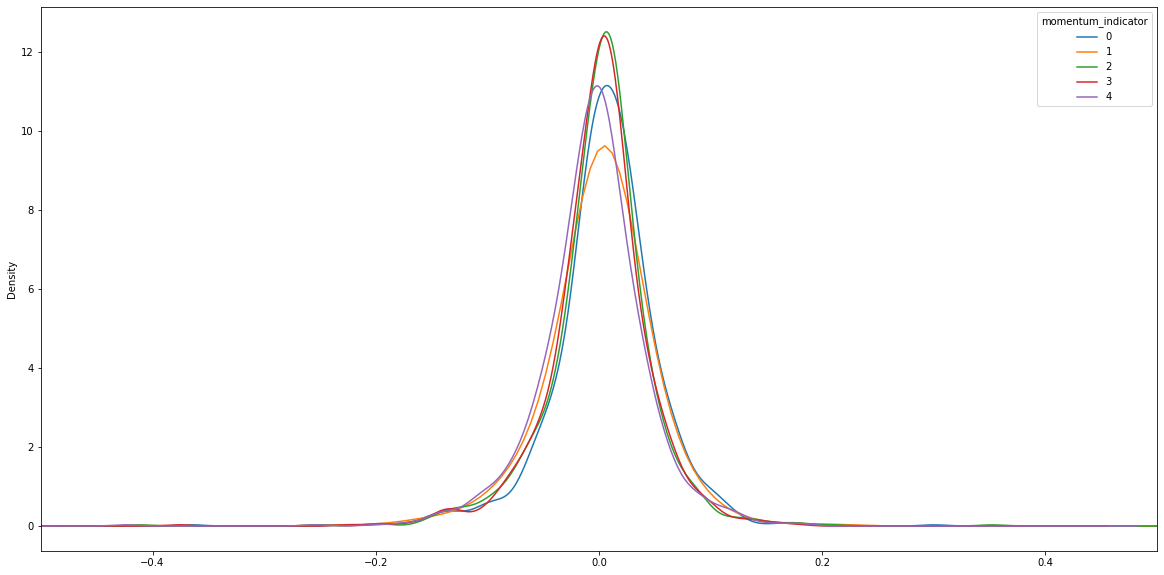

In [68]:
strategy_ret_df.plot(kind="density",figsize=(20,10),xlim=(-0.5,0.5))

In [69]:
strategy_cum_ret_df = (strategy_ret_df+1).cumprod()

<AxesSubplot:xlabel='date'>

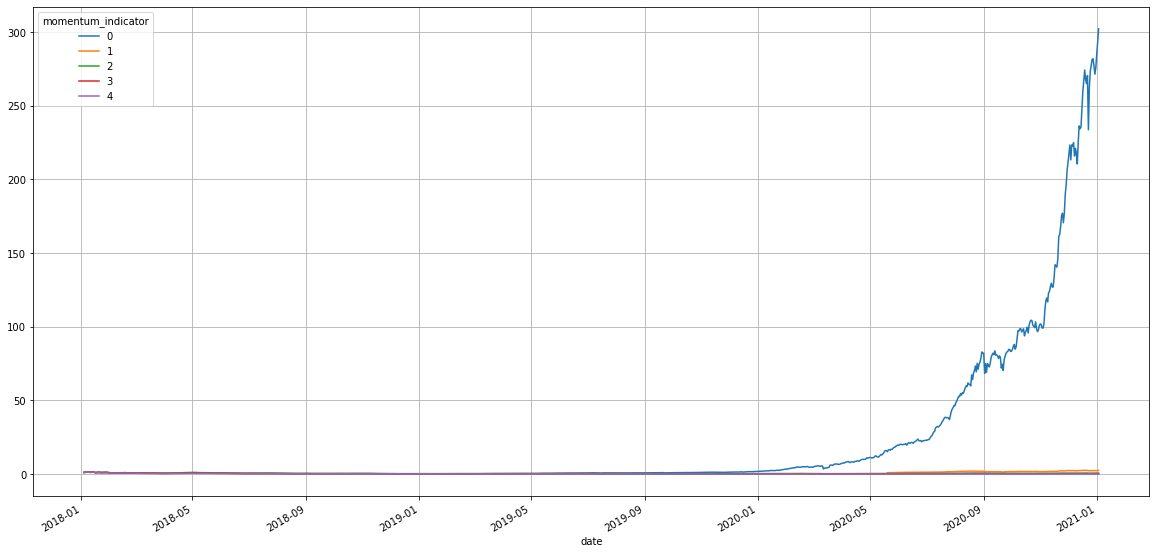

In [70]:
strategy_cum_ret_df.iloc[0:,:].plot(figsize=(20,10),grid=True)

<AxesSubplot:xlabel='date'>

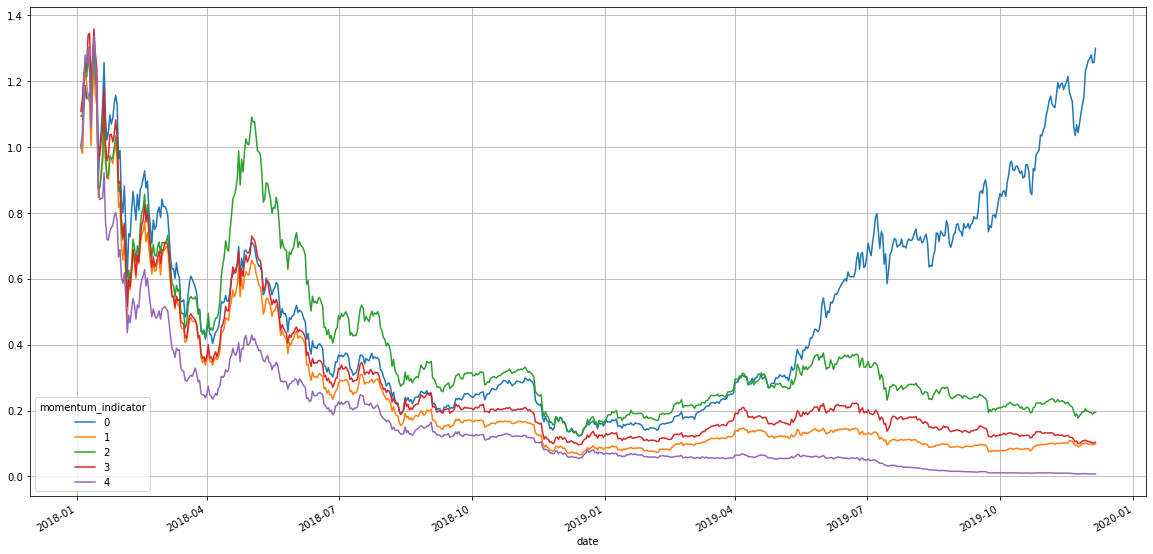

In [75]:
strategy_cum_ret_df.iloc[0:700,:].plot(figsize=(20,10),grid=True)

In [76]:
strategy_ret_df.mean()/strategy_ret_df.std()

momentum_indicator
0    0.133513
1    0.033848
2    0.013714
3   -0.009477
4   -0.110388
dtype: float64

Create a Long Short Strategy

In [77]:
long_short_return = strategy_ret_df.iloc[:,0] - strategy_ret_df.iloc[:,4]

In [78]:
long_short_return.mean()

0.011717345628187057

In [79]:
long_short_return.median()

0.010478592462558192

In [80]:
long_short_return.mean()/long_short_return.std()

0.36822855602799826

In [81]:
long_short_return.median()

0.010478592462558192

In [82]:
factor_return = (long_short_return+1).cumprod()

<AxesSubplot:xlabel='date'>

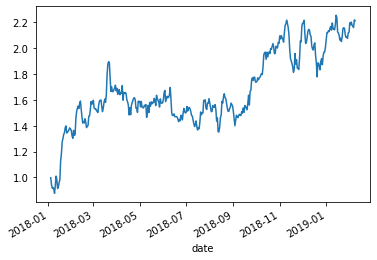

In [89]:
factor_return[0:400].plot()